# **Assignment#5**
### **Unsupervised MLs, Clustering and Profiling on 'Bank marketing data' & Association Analysis on 'TV_Shows-Association_Rules_Learning Data'**
    Dep  : Department of E-Business - Undergraduate, AJOU School of Business, Ajou University
    Code : 201823869 
    Name : seongwoo Cho

<br>

#### **INDEX** 

**A. Clustering and Profiling**
1. Summarize the data set <br>
2. Prepare the data to build a model <br>
3. Build a hybrid model with the k-means clustering and the agglomerative clustering <br>
4. Visualize the clusters in terms of key predictors<br>

<br>

**B. Association Rules**
1. Prepare the data to find out association rules and drop NA <br>
2. Visualzie the most popular 10 items in the data set
3. Show a list of association rules
4. Recommend several item sets of the TV shows based on the support, confidence, and lift measures

<br><br>

---

<br><br>

# **A. Clustering and Profiling**

The data is related to direct marketing campaigns of a Portuguese banking institution. Cluster customers based on their attributes.<br>The data set (the “bankmarketing.csv” file) has the following variables:

1. ***age (numeric)***
2. ***job***: type of job (categorical: admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
3. ***marital***: marital status (categorical: divorced, married, single, unknown; note: divorced includes divorced and widowed)
4. ***education*** (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
5. ***default***: has credit in default? (categorical: no, yes, unknown)
6. ***housing***: has housing loan? (categorical: no, yes, unknown)
7. ***loan***: has personal loan? (categorical: no, yes, unknown)
8. ***contact***: contact communication type (categorical: cellular, telephone)
9. ***month***: last contact month of year (categorical: jan, feb, mar,..., nov, dec)
10. ***day_of_week***: last contact day of the week (categorical: mon, tue, wed, thu, fri)
11. ***poutcome***: outcome of the previous marketing campaign (categorical: failure, nonexistent, success)

<br><br>
### ***A0. Preparing***

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_bm = pd.read_csv('bankmarketing.csv')


### ***A1. Summarize the data set***

In [174]:
df_bm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [175]:
df_bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [176]:
df_bm.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### ***A2. Prepare the data to build a model***
Prepare the data to build a model. Use the “preprocessing.LabelEncoder()” function

In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
# drop missing values
df_bm_p = df_bm.dropna()

print("The total number of data-points after removing the rows with missing values are:", len(df_bm_p))

The total number of data-points after removing the rows with missing values are: 41188


In [179]:
#Feature Engineering

    # Get list of categorical variables
s = df_bm_p.dtypes == 'object'

object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [180]:
'''
# 이론 REF : https://velog.io/@kkiyou/ML0020
    1. Label Encoder :  카테고리형 피쳐를 숫자로 변환하는 기능
    2. Feature scaling : Feature Scaling
        #Feature 변수의 값 범위를 일정한 수준으로 맞추는 것을 의미한다. 예컨대 자동차와 관련된 datasets에서 Feature로 [연비, 가격, 크기, 0-100] 등이 있다면 서로 다른 단위와 범위를 가진다.
        
# 코드 REF : https://needjarvis.tistory.com/690(자비스가 필요해)
'''


LE = LabelEncoder() # 레이블 인코더 생성
    
LE.fit(object_cols) # 레이블 인코더에 obejct_cols 리스트 데이터를 학습시킴

# for i, label in enumerate(LE.classes_): print(i, '->', label) #문자형,숫자형 레이블 출력
# LE.classes_

for i in object_cols:
    df_bm_p[i]=df_bm_p[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")
LE.classes_



All features are now numerical


array(['no', 'yes'], dtype=object)

In [181]:
from sklearn.preprocessing import StandardScaler

#Creating a copy of data
ds = df_bm_p.copy()

### # creating a subset of dataframe by dropping the features on deals previousOutcome
cols_del = ['poutcome']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [182]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
1,1.628993,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
2,-0.290186,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
3,-0.002309,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309
4,1.533034,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,-0.356309


In [183]:
from  sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,41188.0,-8.832618e-17,2.090926,-3.616315,-1.601292,-1.125027,2.080789,7.210773
col2,41188.0,1.104077e-16,1.281133,-3.549148,-0.923138,-0.117992,0.759831,8.016420
col3,41188.0,-1.518106e-17,1.223680,-5.023860,-0.850099,-0.012952,0.805767,5.539518


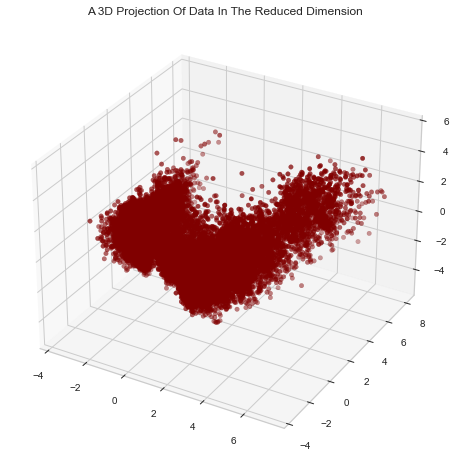

In [184]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### ***A3. Build a hybrid model with the k-means and agglomerative clsutering***

Elbow Method to determine the number of clusters to be formed:


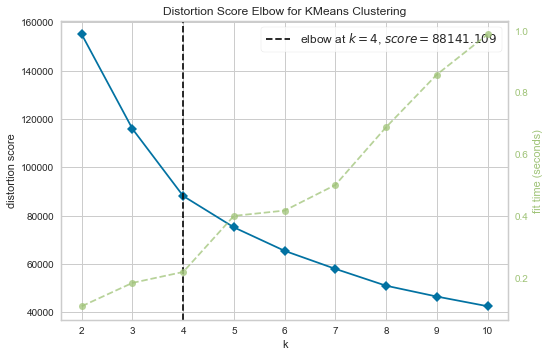

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [185]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [186]:
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
# from matplotlib.colors import ListedColormap
# from sklearn import metrics
# import warnings
# import sys

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_bm_p["Clusters"]= yhat_AC

### ***A4. Visualize the clusters in terms of key predictors***

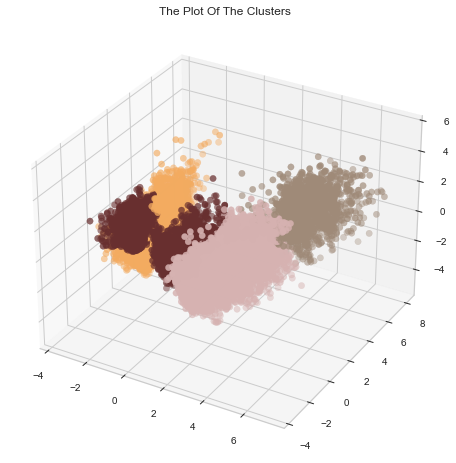

In [187]:
#Plotting the clusters
from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])


fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

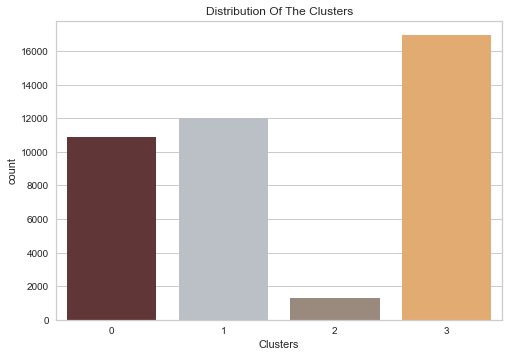

In [188]:
import seaborn as sns
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_bm_p["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

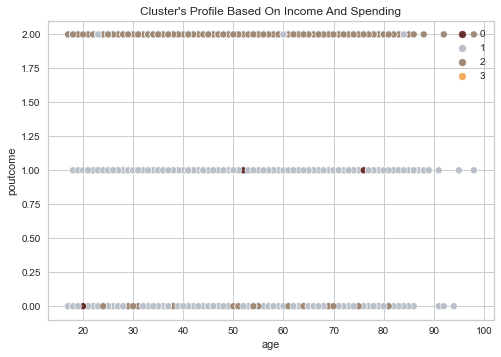

In [189]:
pl = sns.scatterplot(data = df_bm_p,x=df_bm_p["age"], y=df_bm_p["poutcome"],hue=df_bm_p["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

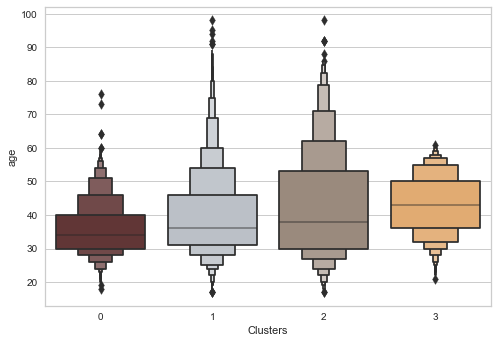

In [190]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["age"], palette=pal)
plt.show()

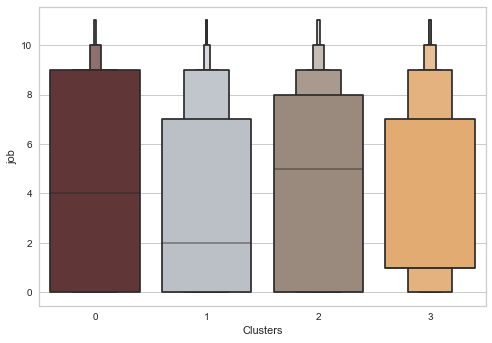

In [191]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["job"], palette=pal)
plt.show()

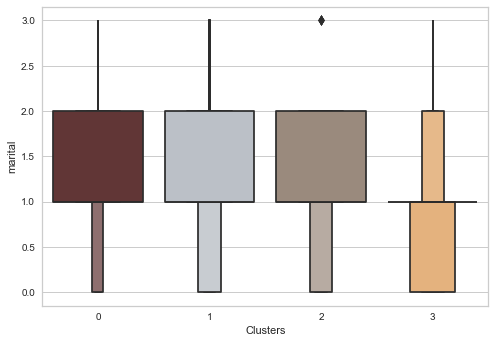

In [192]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["marital"], palette=pal)
plt.show()

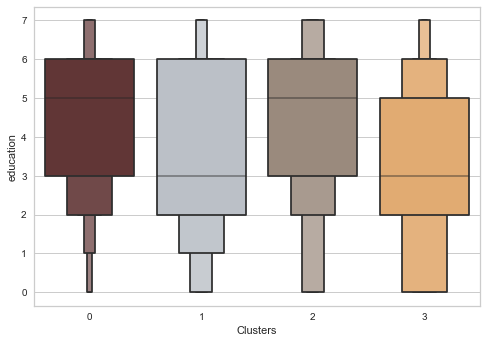

In [193]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], palette=pal)
plt.show()

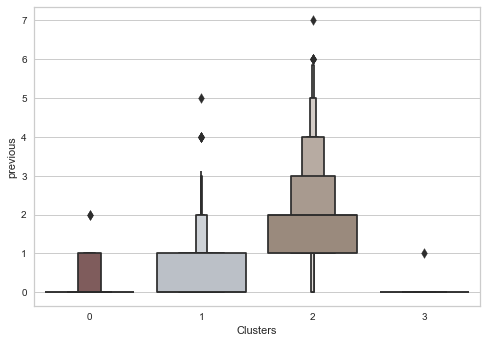

In [194]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["previous"], palette=pal)
plt.show()

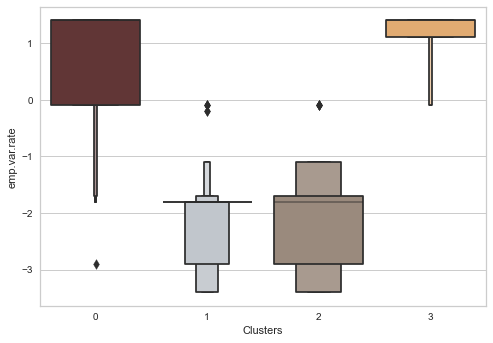

In [195]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["emp.var.rate"], palette=pal)
plt.show()

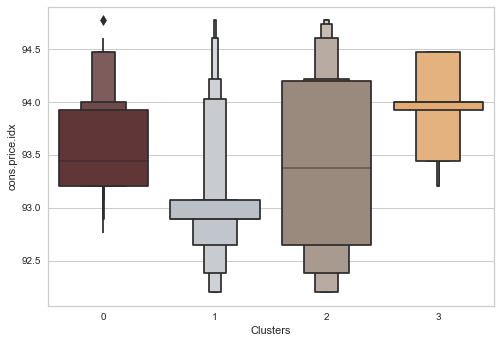

In [196]:

plt.figure()
# pl=sns.swarmplot(x=df_bm_p["Clusters"], y=df_bm_p["education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_bm_p["Clusters"], y=df_bm_p["cons.price.idx"], palette=pal)
plt.show()

<Figure size 576x396 with 0 Axes>

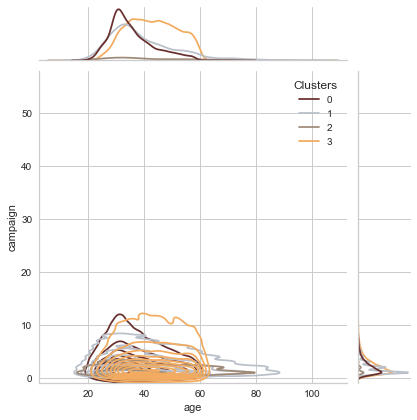

<Figure size 576x396 with 0 Axes>

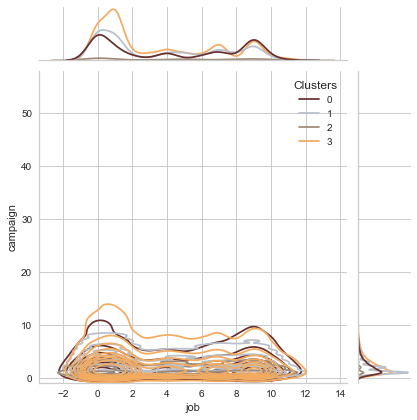

<Figure size 576x396 with 0 Axes>

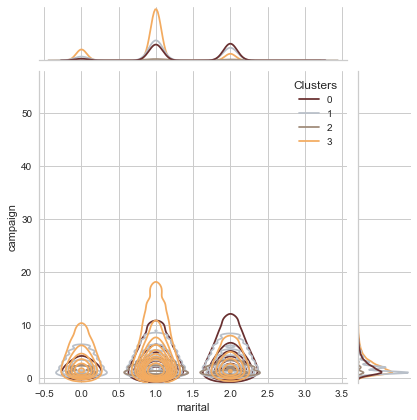

<Figure size 576x396 with 0 Axes>

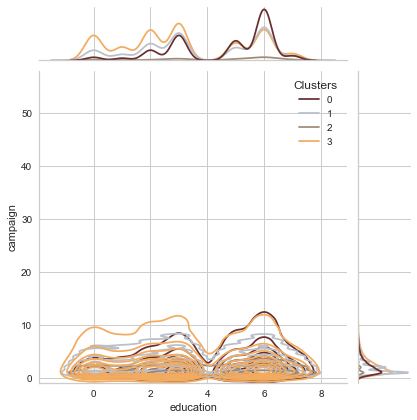

<Figure size 576x396 with 0 Axes>

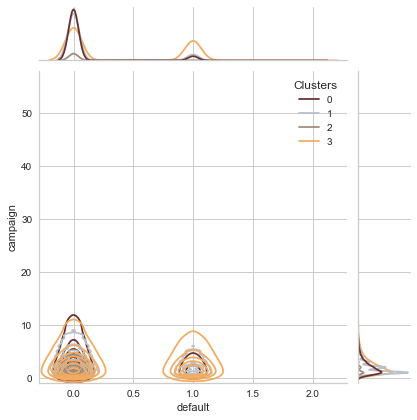

<Figure size 576x396 with 0 Axes>

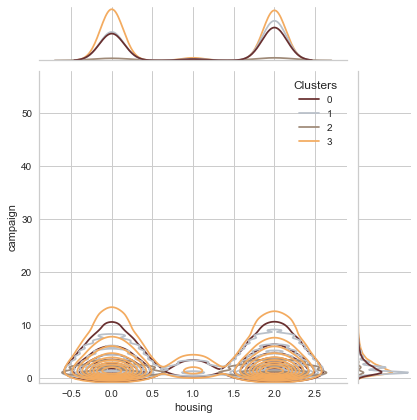

In [200]:
Personal = ['age','job','marital','education','default','housing','loan','contact','month','campaign']

for i in Personal:
    plt.figure()
    sns.jointplot(x=df_bm_p[i], y=df_bm_p["campaign"], hue =df_bm_p["Clusters"], kind="kde", palette=pal)
    plt.show()

<br><br>

# **B. Association Rules**

Like Netflix, a TV show recommender system can always be built with context-based filtering or collaborative filtering.<br> 
With a data set (the “TV_Shows-Association_Rules_Learning.csv” file), association rules can be identified by association rules using the “apriori” algorithm.<br>
The dataset includes details of more than 9,000 viewers watching TV shows. Each row represents the TV shows a viewer has watched together.

<br><br>
### ***A0. Preparing***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_tvasc = pd.read_csv('TV_Shows-Association_Rules_Learning.csv')

### ***B1. Prepare the data to find out association rules and drop NA***

### ***B2. Visualize the most popular 10 items in the data set***

### ***B3. Show a list of association rules***

### ***B4. Recommend several item sets of the TV shows based on the support, confidence, lift measures***